# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №4 (опциональное)
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 17 июня 2017, 23:59

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:
** [ИАД-X] Фамилия Имя ДЗ-4 **

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
np.random.seed(42)
LE = LabelEncoder()
LE.fit(table_data['species'])
Y = LE.transform(table_data['species'])
ids = table_data['id']
X = table_data
del X['id']
del X['species']
X = np.asarray(X)
SSS = StratifiedShuffleSplit(test_size = 198, n_splits=1)
for train_ids, test_ids in SSS.split(X, Y):
    train_idx = train_ids
    test_idx = test_ids

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [8]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


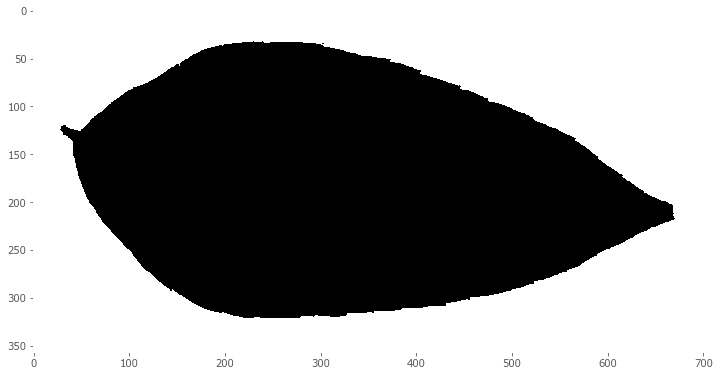

In [9]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [10]:
from scipy.misc import imresize

In [11]:
img_resized = imresize(img, (100, 100))

/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


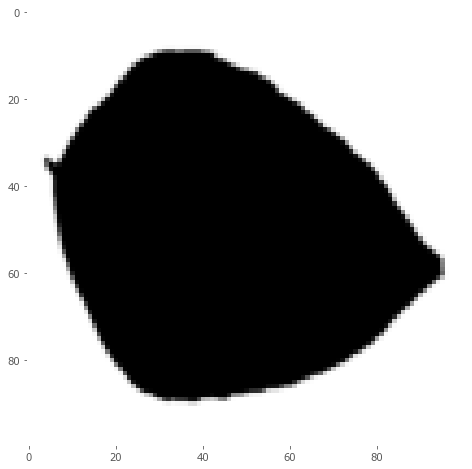

In [12]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только те картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [13]:
imgs = []
for index in ids:
    filepath = os.path.join(IMG_DIR, '{}.jpg'.format(str(index)))
    img = plt.imread(filepath)
    img_resized = imresize(img, (100, 100))
    img = np.ravel(img_resized)
    imgs.append(img)
imgs = np.asarray(imgs)
imgs_train = []
Y_train = []
imgs_test = []
Y_test = []
for train_index in train_idx:
    imgs_train.append(imgs[train_index])
    Y_train.append(Y[train_index])
for test_index in test_idx:
    imgs_test.append(imgs[test_index])
    Y_test.append(Y[test_index])
imgs_train = np.asarray(imgs_train)
Y_train = np.asarray(Y_train)
imgs_test = np.asarray(imgs_test)
Y_test = np.asarray(Y_test)

/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

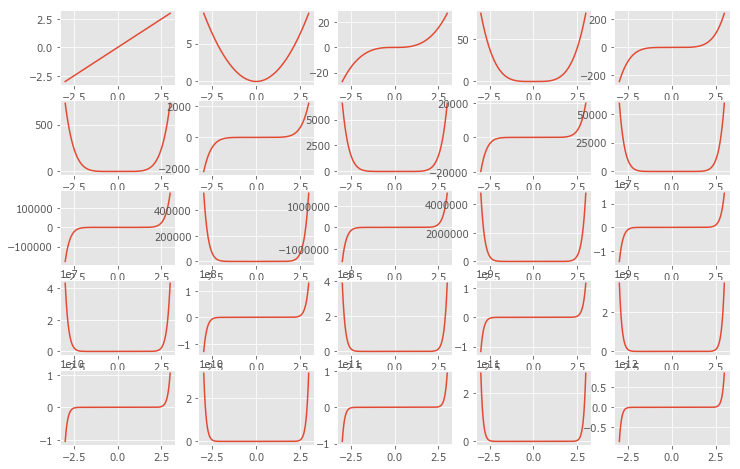

In [14]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если считать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

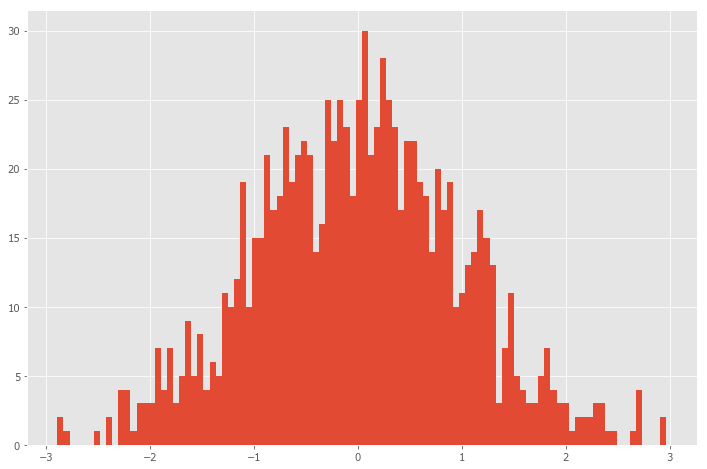

In [15]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


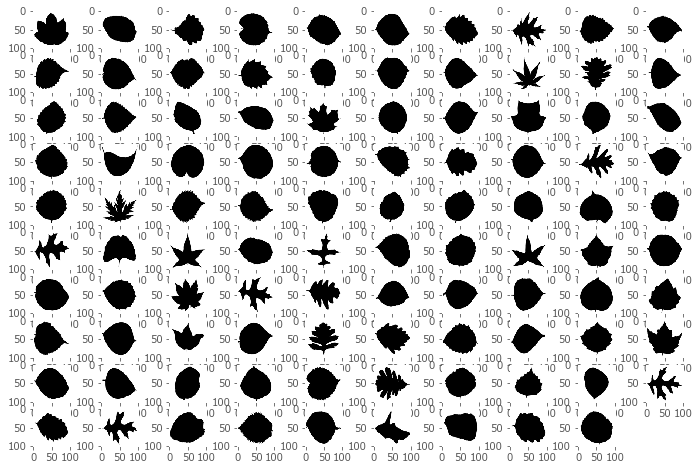

In [16]:
species_list = []
n = 1
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)
i = 0
while n != 100:
    if (table_data.loc[i])['species'] not in species_list:
        index = str((table_data.loc[i])['id'])
        img_filepath = os.path.join(IMG_DIR, index + '.jpg')
        img = plt.imread(img_filepath)
        img_resized = imresize(img, (100, 100))
        plt.subplot(10, 10, n)
        plt.imshow(img_resized, cmap='Greys')
        plt.grid(None)
        species_list.append((table_data.loc[i])['species'])
        n += 1
    i += 1

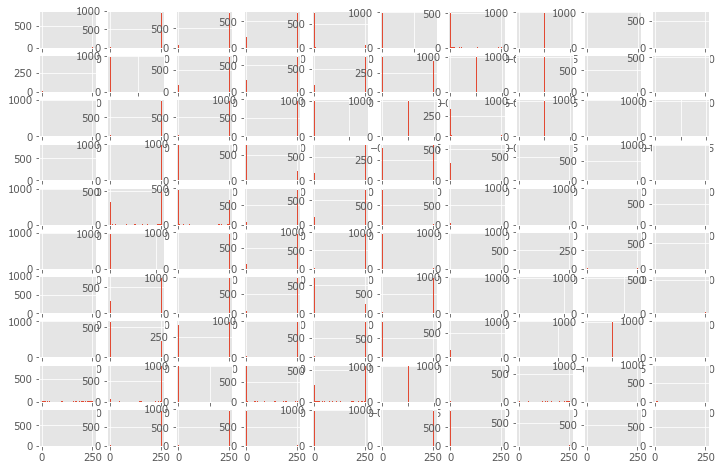

In [17]:
import collections

pixels_list = []
elements_count = {}
for i in range(1, 101):
    pixel_id = np.random.randint(10000)
    while pixel_id in pixels_list:
        pixel_id = np.random.randint(10000)
    vector = []
    for n in range(len(imgs)):
        vector.append(imgs[n][pixel_id])
        if imgs[n][pixel_id] not in elements_count:
            elements_count[imgs[n][pixel_id]] = 1
        else:
            elements_count[imgs[n][pixel_id]] += 1
    vector = np.asarray(vector)
    plt.subplot(10, 10, i)
    plt.hist(vector, bins=100)
    pixels_list.append(pixel_id)

In [18]:
elements_count = collections.OrderedDict(sorted(elements_count.items())) #считает встречаемость каждого значения признака
print(elements_count)

OrderedDict([(0, 45326), (1, 261), (2, 158), (3, 113), (4, 80), (5, 107), (6, 85), (7, 54), (8, 48), (9, 52), (10, 67), (11, 46), (12, 43), (13, 39), (14, 44), (15, 49), (16, 33), (17, 37), (18, 34), (19, 34), (20, 31), (21, 39), (22, 35), (23, 31), (24, 39), (25, 25), (26, 34), (27, 31), (28, 33), (29, 32), (30, 24), (31, 21), (32, 22), (33, 26), (34, 21), (35, 20), (36, 28), (37, 37), (38, 16), (39, 31), (40, 18), (41, 23), (42, 25), (43, 17), (44, 22), (45, 21), (46, 15), (47, 20), (48, 27), (49, 24), (50, 31), (51, 27), (52, 15), (53, 16), (54, 19), (55, 16), (56, 14), (57, 15), (58, 18), (59, 17), (60, 25), (61, 19), (62, 17), (63, 18), (64, 9), (65, 15), (66, 17), (67, 17), (68, 14), (69, 10), (70, 14), (71, 18), (72, 12), (73, 17), (74, 15), (75, 21), (76, 14), (77, 17), (78, 19), (79, 12), (80, 10), (81, 24), (82, 19), (83, 13), (84, 23), (85, 7), (86, 11), (87, 13), (88, 14), (89, 12), (90, 14), (91, 25), (92, 6), (93, 15), (94, 10), (95, 19), (96, 18), (97, 16), (98, 14), (99

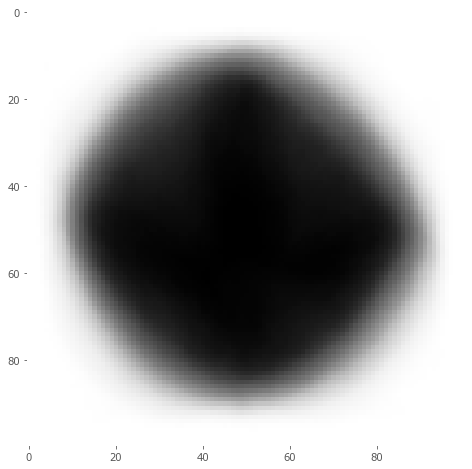

In [19]:
mean_leaf = [[] for i in range(10000)]
for i in range(len(imgs)):
    img = imgs[i]
    for j in range(10000):
        (mean_leaf[j]).append(img[j])
for i in range(10000):
    mean_leaf[i] = np.mean(mean_leaf[i])
mean_leaf = np.asarray(mean_leaf)
mean_leaf = np.reshape(mean_leaf, (100, 100))
plt.imshow(mean_leaf, cmap='Greys')
plt.grid(None)

10000


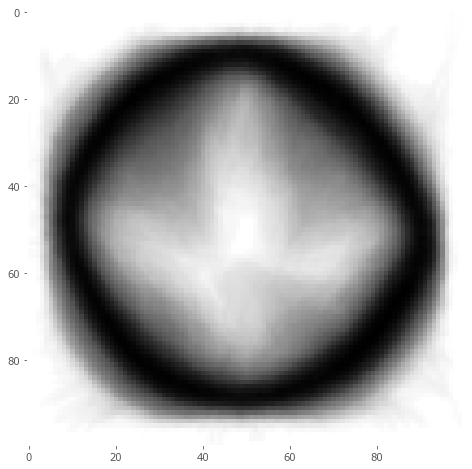

In [20]:
count_constants = 0 #считает число констатных признаков
std = [[] for i in range(10000)]
for i in range(len(imgs)):
    img = imgs[i]
    for j in range(10000):
        (std[j]).append(img[j])
for i in range(10000):
    std[i] = np.std(std[i])
    if np.std(std[i]) == 0:
        count_constants += 1
std = np.asarray(std)
std = np.reshape(std, (100, 100))
plt.imshow(std, cmap='Greys')
plt.grid(None)
print(count_constants)

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

- Да, большая часть листьев круглая и без выступов, но есть круглые листья с небольшими выступами (изображения 3, 7, 14 и т. д.) и узорчатые листья (изображения 7, 17, 18 и т. д.) 
- Минимум - 0, максимум - 255, принимает все значения от 1 до 255, самые частые значения - 0 и 255. Да, похожи - у каждого признака есть одно или два самых частых значения (обычно это 0 или 255, никогда и то и то).
- Можно, т. к., самых частых значений 2 (следующие за ними встречаются больше чем в 100 раз реже). Порог -- 127 (среднее между 0 и 255).
- Да, средний лист круглый и без выступов, как и листья большинства классов. Константных признаков 10000, они располагаются в центре листа и по краям картинки 100 на 100 (т. к. центр изображения всегда чёрный, а края всегда белые)

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

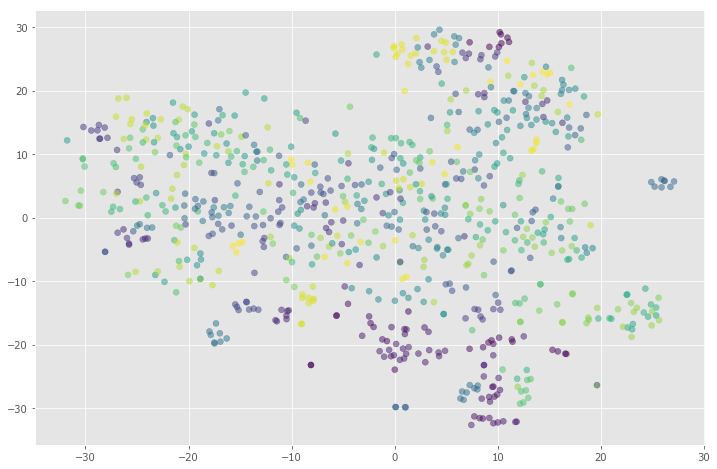

In [21]:
from sklearn.manifold import TSNE

X_train_embedded = TSNE(n_components=2, perplexity=50).fit_transform(imgs_train) #p = 2
fig, ax = plt.subplots()
ax.scatter(X_train_embedded[:, 0], X_train_embedded[:, 1], c=Y_train, alpha=0.5)
ax.legend()

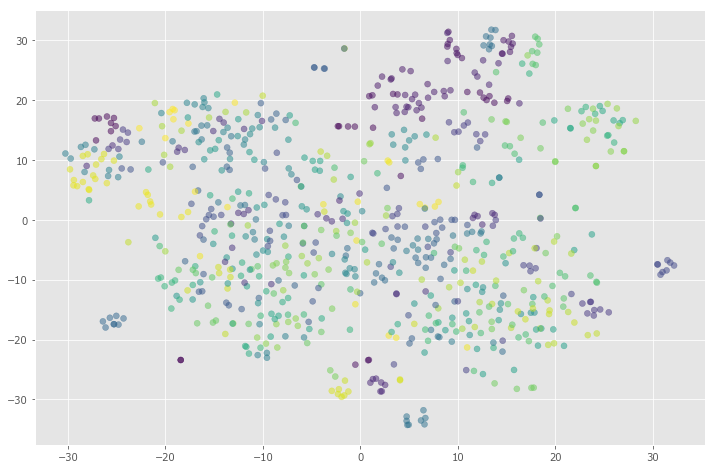

In [22]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

X_precomputed = pdist(imgs_train, metric = 'minkowski', p = 1) # p = 1
X_precomputed = squareform(X_precomputed)
X_train_embedded = TSNE(n_components=2, perplexity=50, metric = 'precomputed').fit_transform(X_precomputed)
fig, ax = plt.subplots()
ax.scatter(X_train_embedded[:, 0], X_train_embedded[:, 1], c=Y_train, alpha=0.5)
ax.legend()

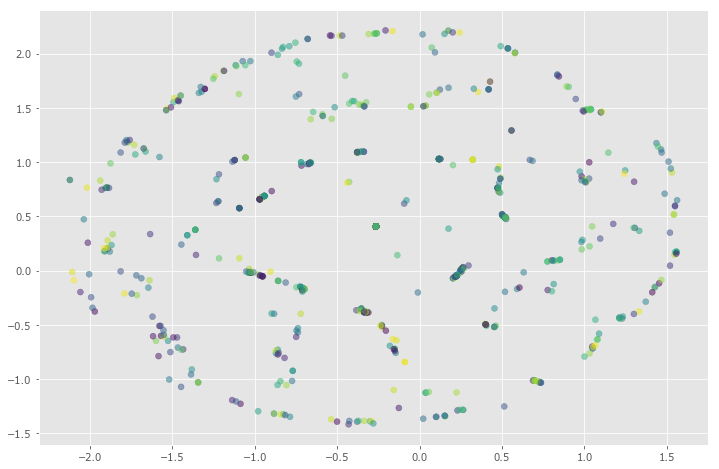

In [23]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

X_precomputed = pdist(imgs_train, metric = 'minkowski', p = np.infty) # p = бесконечность
X_precomputed = squareform(X_precomputed)
X_train_embedded = TSNE(n_components=2, perplexity=50, metric = 'precomputed').fit_transform(X_precomputed)
fig, ax = plt.subplots()
ax.scatter(X_train_embedded[:, 0], X_train_embedded[:, 1], c=Y_train, alpha=0.5)
ax.legend()

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

- Да.
- Нет.
- С p = 2.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

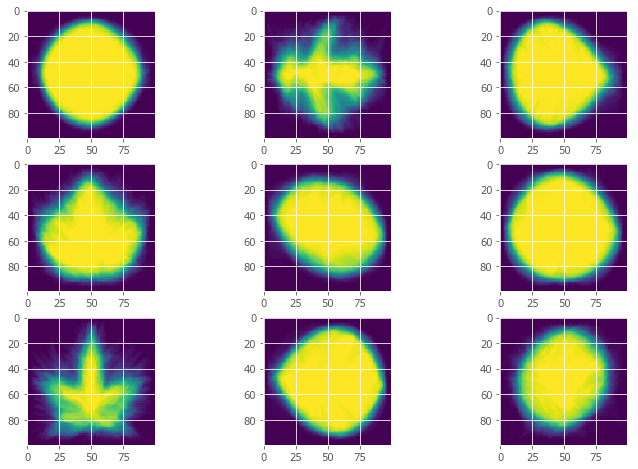

In [24]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters = 9)
KM.fit(imgs_train)
centers = KM.cluster_centers_
for i in range(9):
    plt.subplot(3, 3, i + 1)
    center = centers[i]
    center = np.reshape(center, (100, 100))
    img = plt.imshow(center)
plt.show()

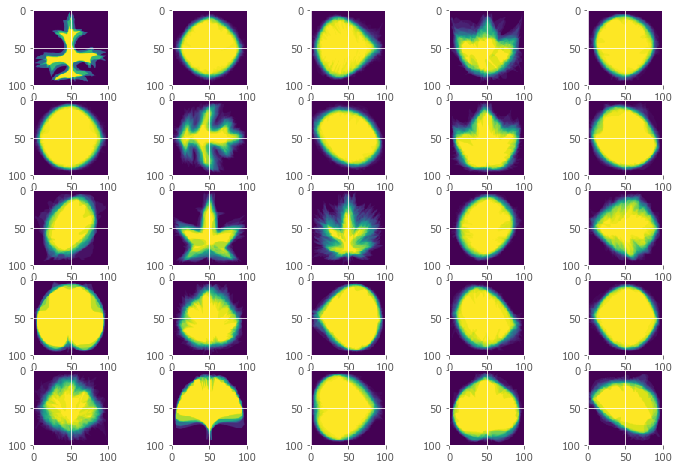

In [25]:
KM = KMeans(n_clusters = 25)
KM.fit(imgs_train)
centers = KM.cluster_centers_
for i in range(25):
    plt.subplot(5, 5, i + 1)
    center = centers[i]
    center = np.reshape(center, (100, 100))
    img = plt.imshow(center)
plt.show()

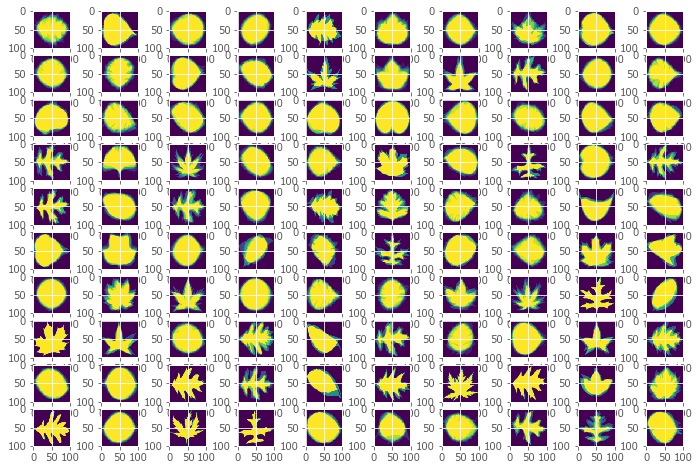

In [26]:
KM = KMeans(n_clusters = 100)
KM.fit(imgs_train)
centers = KM.cluster_centers_
for i in range(100):
    plt.subplot(10, 10, i + 1)
    center = centers[i]
    center = np.reshape(center, (100, 100))
    img = plt.imshow(center)
plt.show()

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

- Да, похожи.
- Форма - круглые и узорчатые.
- Да, есть.
- 100, т. к., узорчатые листья точнее классифицируются.

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? 

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature\_log\_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [27]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

NC = NearestCentroid()
NC.fit(imgs_train, Y_train)
Y_pred = NC.predict(imgs_test)
print(accuracy_score(Y_test, Y_pred))

0.5505050505050505


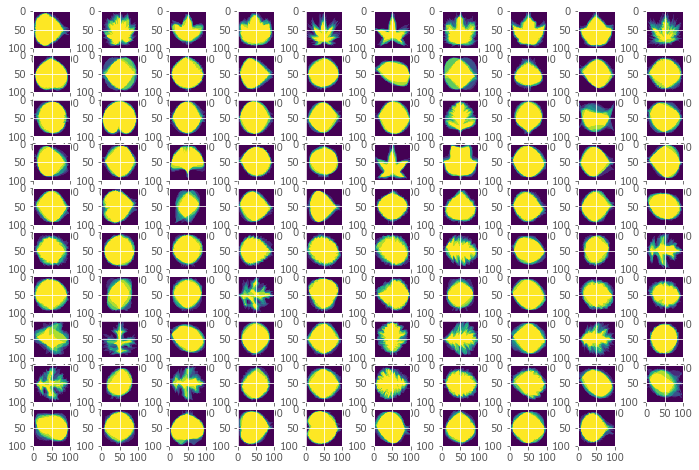

In [28]:
centroids = NC.centroids_
for i in range(99):
    plt.subplot(10, 10, i + 1)
    centroid = centroids[i]
    centroid = np.reshape(centroid, (100, 100))
    img = plt.imshow(centroid)
plt.show()

In [29]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(imgs_train, Y_train)
Y_pred = MNB.predict(imgs_test)
print(accuracy_score(Y_test, Y_pred))

0.51010101010101


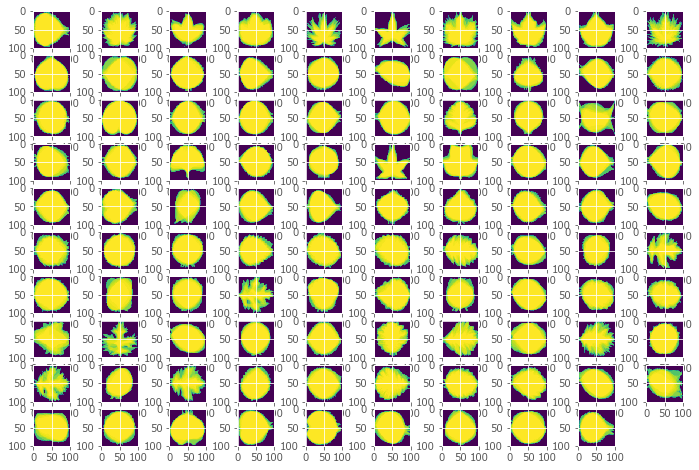

In [30]:
log_probs = MNB.feature_log_prob_
for i in range(99):
    plt.subplot(10, 10, i + 1)
    log_prob = log_probs[i]
    log_prob = np.reshape(log_prob, (100, 100))
    img = plt.imshow(log_prob)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(imgs_train, Y_train)
Y_pred = LR.predict(imgs_test)
print(accuracy_score(Y_test, Y_pred))

0.5858585858585859


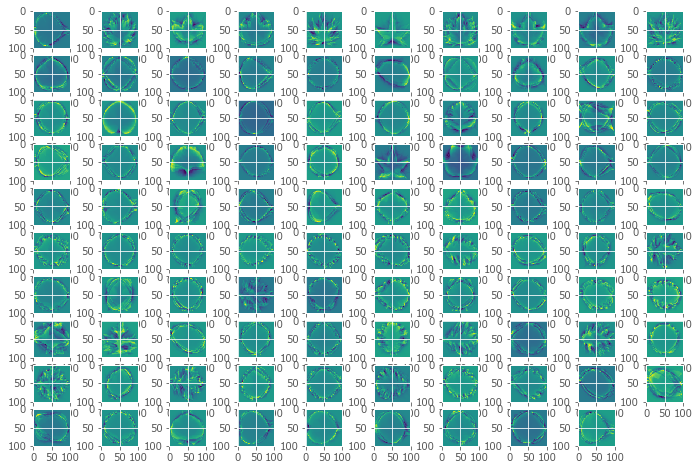

In [32]:
coefs = LR.coef_
for i in range(99):
    plt.subplot(10, 10, i + 1)
    coef = coefs[i]
    coef = np.reshape(coef, (100, 100))
    img = plt.imshow(coef)
plt.show()

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

- Логистическая регрессия.
- Да, похожи все три.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(imgs_train, Y_train)
Y_pred = RF.predict(imgs_test)
print(accuracy_score(Y_test, Y_pred))

0.36363636363636365


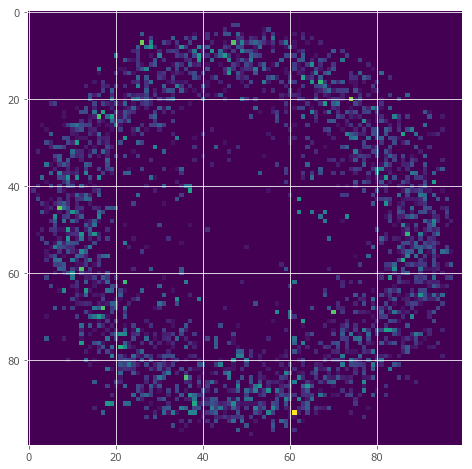

In [34]:
feature_importances = np.reshape(RF.feature_importances_, (100, 100))
plt.imshow(feature_importances)

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

- Да, похожа на круглый лист.
- Да, края картинки 100 на 100 и  центр листа (которые RF определил как неважные) не помогают определить класс (т. к., там расположены констатные признаки), важны только края листа.

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы придумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

In [35]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB(binarize = 0.5)
BNB.fit(imgs_train, Y_train)
Y_pred = BNB.predict(imgs_test)
print(accuracy_score(Y_test, Y_pred))

0.51010101010101


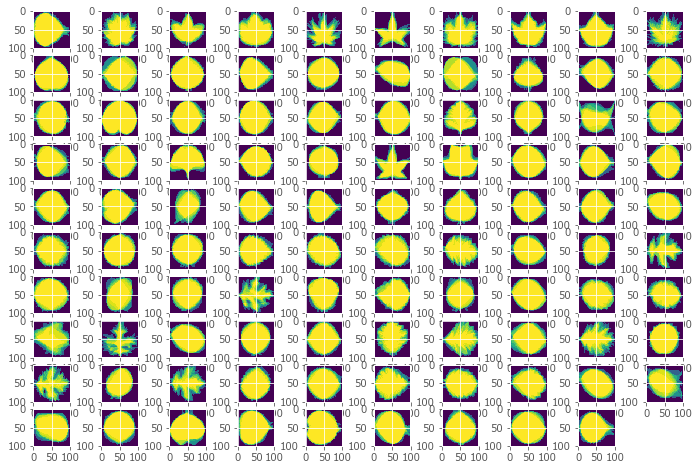

In [36]:
log_probs = BNB.feature_log_prob_
for i in range(99):
    plt.subplot(10, 10, i + 1)
    log_prob = log_probs[i]
    log_prob = np.reshape(log_prob, (100, 100))
    img = plt.imshow(log_prob)
plt.show()

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

- Нет, осталось прежним, бинаризация ни на что не повлияла.
- Да.

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [37]:
num_components = 2**np.arange(10)

In [38]:
from sklearn.decomposition import PCA

accuracies_train = []
accuracies_test = []
for n in num_components:
    pca = PCA(n_components = n)
    X_embedded_train = pca.fit_transform(imgs_train)
    X_embedded_test = pca.transform(imgs_test)
    RF = RandomForestClassifier()
    RF.fit(X_embedded_train, Y_train)
    Y_pred_train = RF.predict(X_embedded_train)
    Y_pred_test = RF.predict(X_embedded_test)
    accuracies_train.append(accuracy_score(Y_train, Y_pred_train))
    accuracies_test.append(accuracy_score(Y_test, Y_pred_test))

RF = RandomForestClassifier()
RF.fit(imgs_train, Y_train)
Y_pred_train = RF.predict(imgs_train)
Y_pred_test = RF.predict(imgs_test)
print('Качество на контроле для исходных признаков' + str(accuracy_score(Y_train, Y_pred_train)))
print('Качество на обучении для исходных признаков' + str(accuracy_score(Y_test, Y_pred_test)))
accuracies = [accuracy_score(Y_test, Y_pred_test) for i in 2**np.arange(10)]

Качество на контроле для исходных признаков0.9974747474747475
Качество на обучении для исходных признаков0.3939393939393939


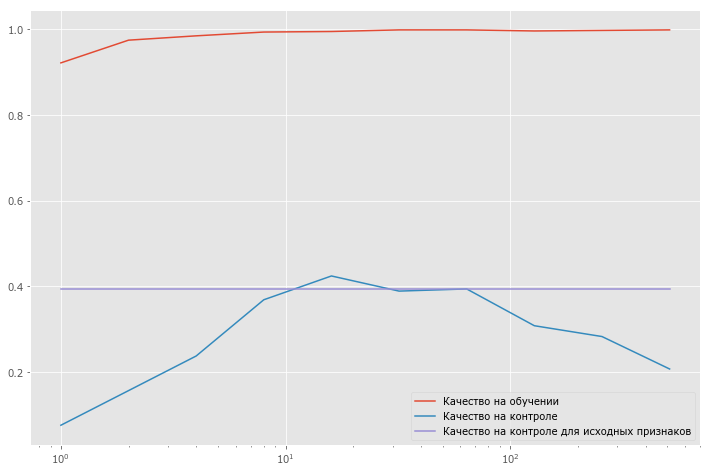

In [39]:
plt.plot(num_components, accuracies_train, label = 'Качество на обучении')
plt.plot(num_components, accuracies_test, label = 'Качество на контроле')
plt.plot(num_components, accuracies, label = 'Качество на контроле для исходных признаков')
plt.xscale("log")
plt.legend()
plt.show()

In [40]:
print(num_components[accuracies_test.index(max(accuracies_test))])
print(max(accuracies_test))

16
0.42424242424242425


Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

- Да, качество хорошее на обучении, на контроле с увеличением числа компонент сначала повышается, затем начинает снижаться.
- Да, n = 16. Нет, не сильно, качество на контроле на исходных признаках = 0.3(8), со снижением размерности = 0.(43)

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждого признака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   0    1    2 ... 9997 9998 9999] are constant.
  UserWarning)
/Users/olgapichuzhkina/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


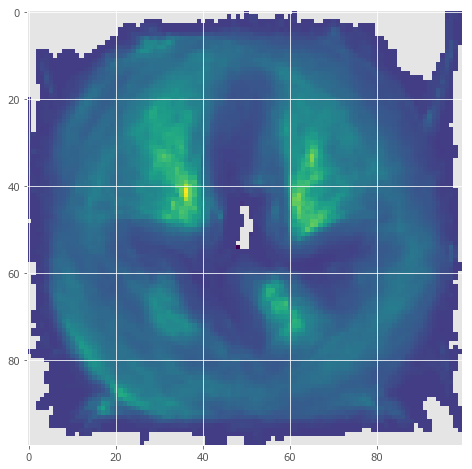

In [41]:
from sklearn.feature_selection import SelectKBest

SKB = SelectKBest()
SKB.fit(imgs_train, Y_train)
scores = np.reshape(SKB.scores_, (100, 100))
plt.imshow(scores)

In [42]:
scores = np.ndarray.tolist(SKB.scores_)
scores_sorted = sorted(scores, reverse = True)
imgs_100_train = [[] for i in range(len(imgs_train))]
imgs_100_test = [[] for i in range(len(imgs_test))]
for i in range(99):
    score_index = (scores).index(scores_sorted[i])
    for j in range(len(imgs_train)):
        (imgs_100_train[j]).append(imgs_train[j][score_index])
    for j in range(len(imgs_test)):
        (imgs_100_test[j]).append(imgs_test[j][score_index])
imgs_100_train = np.asarray(imgs_100_train)
imgs_100_test = np.asarray(imgs_100_test)
LR = LogisticRegression()
LR.fit(imgs_100_train, Y_train)
Y_pred = LR.predict(imgs_100_test)
print(accuracy_score(Y_test, Y_pred))

0.010101010101010102


Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

- Да (неважные -- центр листа и края картинки), но неважных признаков слишком мало.
- Да, сильно уменьшилось.

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

KFold = StratifiedKFold(n_splits = 4)
RF = RandomForestClassifier()
GridSearch = GridSearchCV(estimator = RF, cv = KFold, param_grid = {'n_estimators': [i for i in range(1, 21)]})
GridSearch.fit(imgs_train, Y_train)
RF_best = GridSearch.best_estimator_
Y_predict = RF_best.predict(imgs_test)
print(accuracy_score(Y_test, Y_predict))

0.4797979797979798


In [44]:
for i in range(len(Y_test)):
    print(str(Y_test[i]) + ' ' + str(Y_predict[i]))

2 2
21 21
81 81
30 30
79 79
64 64
85 65
36 21
27 27
97 67
25 25
25 25
76 69
95 95
33 33
26 26
11 11
42 42
32 32
88 54
24 93
60 90
54 54
93 11
20 91
73 62
19 18
82 9
68 68
14 14
94 93
89 89
55 84
17 17
89 89
70 87
69 17
4 4
27 27
65 31
13 13
44 38
7 7
84 40
61 61
52 51
37 37
42 42
60 90
66 27
57 57
46 14
20 20
61 61
75 75
38 38
22 22
80 59
67 40
88 28
15 15
67 40
51 20
32 32
83 83
52 91
63 63
43 43
5 5
96 96
87 18
41 93
23 23
56 53
4 4
48 24
91 12
53 36
91 14
45 45
9 9
90 90
96 83
53 53
47 47
21 21
90 90
58 58
35 5
97 37
71 71
50 29
74 57
3 3
26 17
63 21
83 58
44 30
93 93
86 57
35 35
65 55
87 52
92 92
8 8
82 80
11 25
12 51
31 74
17 17
30 30
16 0
71 5
18 27
84 52
0 0
1 1
34 51
28 28
9 9
2 2
75 66
29 67
50 50
39 22
23 23
10 12
46 46
45 96
62 62
40 23
13 13
80 2
41 0
64 64
15 15
57 69
37 37
72 50
59 71
7 7
94 94
70 49
49 49
1 7
76 69
12 12
28 28
86 49
55 70
66 81
16 43
69 69
78 46
3 3
62 27
14 14
6 7
24 60
59 59
85 85
58 58
68 55
72 57
74 24
95 95
92 10
33 33
47 91
73 40
10 12
18 18
39 22


Лист:


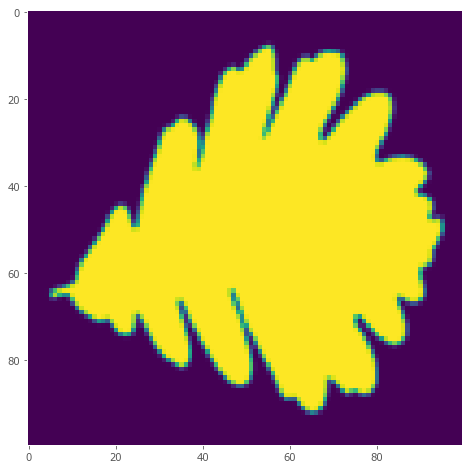

In [53]:
print('Лист:')
img = np.reshape(imgs_test[6], (100, 100))
plt.imshow(img)
plt.grid(None)

Лист предсказанного класса:


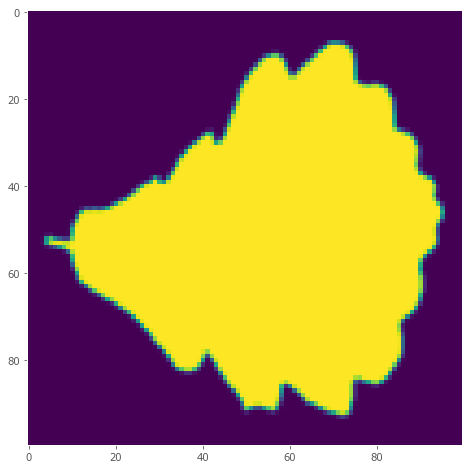

In [54]:
print('Лист предсказанного класса:')
for i in range(len(Y_train)):
    if Y_train[i] == 65:
        img = np.reshape(imgs_train[i], (100, 100))
        plt.imshow(img)
        break
plt.grid(None)

Лист:


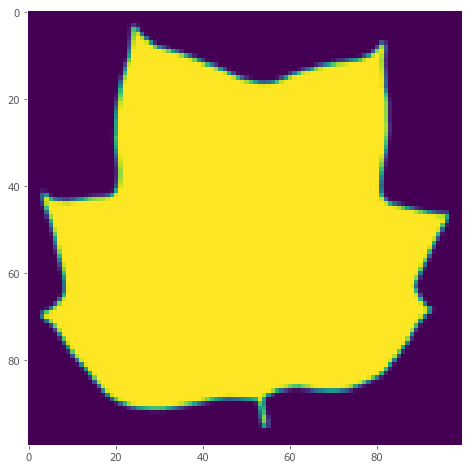

In [55]:
print('Лист:')
img = np.reshape(imgs_test[7], (100, 100))
plt.imshow(img)
plt.grid(None)

Лист предсказанного класса:


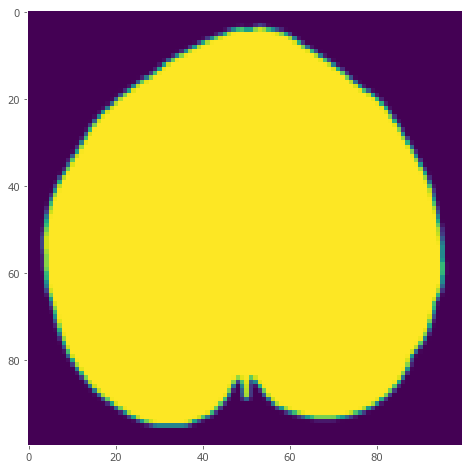

In [56]:
print('Лист предсказанного класса:')
for i in range(len(Y_train)):
    if Y_train[i] == 21:
        img = np.reshape(imgs_train[i], (100, 100))
        plt.imshow(img)
        break
plt.grid(None)

Лист:


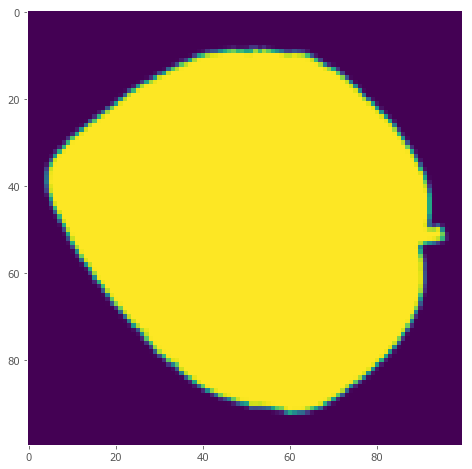

In [57]:
print('Лист:')
img = np.reshape(imgs_test[9], (100, 100))
plt.imshow(img)
plt.grid(None)

Лист предсказанного класса:


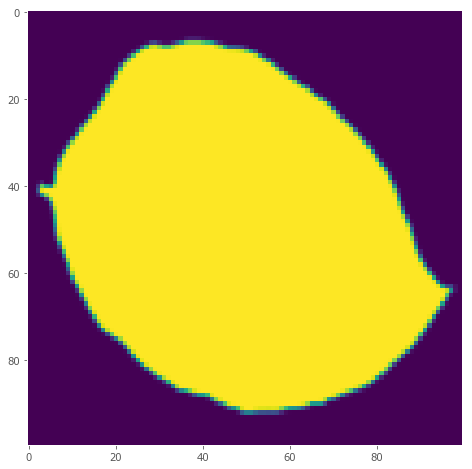

In [58]:
print('Лист предсказанного класса:')
for i in range(len(Y_train)):
    if Y_train[i] == 67:
        img = np.reshape(imgs_train[i], (100, 100))
        plt.imshow(img)
        break
plt.grid(None)

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.